In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [32]:
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline

In [2]:
df = pd.read_csv('thads2013n.txt')

In [3]:
df.head()

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,...,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,...,'1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,...,'3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,...,'2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,...,'2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,...,'3 GT FMR','3 50 - 60% AMI','3 50 - 60% AMI','3 50 - 60% AMI','3 50 - 60% AMI','7 120% AMI +','0 Not Assisted','1 Less than 30%','-5','-5'


In [4]:
df.keys()

Index(['CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED', 'FMR', 'L30', 'L50',
       'L80', 'IPOV', 'BEDRMS', 'BUILT', 'STATUS', 'TYPE', 'VALUE', 'VACANCY',
       'TENURE', 'NUNITS', 'ROOMS', 'WEIGHT', 'PER', 'ZINC2', 'ZADEQ', 'ZSMHC',
       'STRUCTURETYPE', 'OWNRENT', 'UTILITY', 'OTHERCOST', 'COST06', 'COST12',
       'COST08', 'COSTMED', 'TOTSAL', 'ASSISTED', 'GLMED', 'GL30', 'GL50',
       'GL80', 'APLMED', 'ABL30', 'ABL50', 'ABL80', 'ABLMED', 'BURDEN',
       'INCRELAMIPCT', 'INCRELAMICAT', 'INCRELPOVPCT', 'INCRELPOVCAT',
       'INCRELFMRPCT', 'INCRELFMRCAT', 'COST06RELAMIPCT', 'COST06RELAMICAT',
       'COST06RELPOVPCT', 'COST06RELPOVCAT', 'COST06RELFMRPCT',
       'COST06RELFMRCAT', 'COST08RELAMIPCT', 'COST08RELAMICAT',
       'COST08RELPOVPCT', 'COST08RELPOVCAT', 'COST08RELFMRPCT',
       'COST08RELFMRCAT', 'COST12RELAMIPCT', 'COST12RELAMICAT',
       'COST12RELPOVPCT', 'COST12RELPOVCAT', 'COST12RELFMRPCT',
       'COST12RELFMRCAT', 'COSTMedRELAMIPCT', 'COSTMedRELAMICAT',
      

In [5]:
fields = df[["BUILT", "BEDRMS", "LMED", "UTILITY", "TYPE", ]]

In [6]:
fields.head()

,BUILT,BEDRMS,LMED,UTILITY,TYPE
0,2006,2,73738,169.000000,1
1,1980,4,55846,245.333333,1
2,1985,4,55846,159.000000,1
3,1985,3,55846,179.000000,1
4,1980,2,60991,146.000000,1


In [7]:
values = df['VALUE']

In [8]:
values.head()

0     40000
1    130000
2    150000
3    200000
4        -6
Name: VALUE, dtype: int64

In [9]:
fields_train, fields_test, values_train, values_test = train_test_split(fields, values, test_size=.33, random_state=99, )

In [16]:
RFC = RandomForestClassifier(n_estimators=100)

In [17]:
RFC.fit(fields_train, values_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [29]:
RFC.score(fields_test, values_test)

0.36601399258111472

In [20]:
prediction = RFC.predict(fields_test)

In [21]:
len(prediction)

21297

In [23]:
prediction[:100]

array([ 130000,      -6,  250000,  350000,   70000,  200000, 2520000,
        640000,  420000,  100000,   80000,      -6,      -6,  130000,
            -6,  530000,  220000,   70000,   50000,   70000,      -6,
        150000,      -6,  100000,      -6,      -6,  150000,  130000,
        500000,  150000,  260000,  170000,      -6,      -6,  220000,
        130000,   60000,      -6,  110000,      -6,  330000,  200000,
        140000,      -6,      -6,      -6,   40000,  200000,      -6,
        200000,       1,      -6,      -6,   80000,      -6,  120000,
        170000,      -6,  350000,      -6,      -6,  400000,  250000,
        300000,      -6,  280000,   60000,      -6,   80000,  140000,
        130000,      -6,      -6,  130000,      -6,  270000,      -6,
        180000,  180000,  320000,      -6,      -6,      -6,      -6,
        500000,      -6,  300000,  180000,  150000,      -6,  360000,
            -6,  180000,      -6,   40000,  250000,      -6,      -6,
            -6,  350

In [28]:
values_test[:10]

13587         -6
3670          -6
35064    2520000
4311     2520000
22567      80000
2717          -6
39038     950000
44699     400000
38707     300000
401       230000
Name: VALUE, dtype: int64

I consider this a poisoned data set

In [34]:
plt.plot?

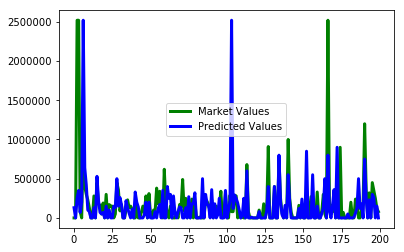

In [49]:
plt.plot(np.array(values_test[:200]), linewidth=3, label='Market Values', color='green')
plt.plot(prediction[:200], linewidth=3, label='Predicted Values', color='blue')
plt.legend()
plt.show()

It could be interesting to look at the property where the value was projected high but the actual market value was low.  